In [163]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
from xbbg import blp



df = pd.read_csv("cnhsdr2021-2022.csv")
df.head()

,Underlying,Type,Strike,Expiry,Notional,Curr,Premium,Curr.1,Style,Code,Clr,Trd Time
0,USD CNY Vanilla Option,C,6.650,02/01/22,"30,000,000.00",USD,"669,900.00",USD,EU,TR,U,02/01/2021 13:41:16
1,USD CNY Vanilla Option,C,7.210,02/01/22,"30,000,000.00",USD,"182,100.00",USD,EU,TR,U,02/01/2021 13:41:16
2,USD CNY Vanilla Option,C,6.555,02/11/21,"50,000,000.00",USD,"32,550.00",USD,EU,TR,U,02/01/2021 11:49:56
3,USD CNY Vanilla Option,P,6.550,02/10/21,"50,000,000.00",USD,"29,650.00",USD,EU,TR,U,02/01/2021 11:45:50
4,USD CNY Vanilla Option,P,6.550,02/10/21,"50,000,000.00",USD,"29,650.00",USD,EU,TE,U,02/01/2021 11:45:50


In [164]:
val=df.dropna()

val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38417 entries, 0 to 38416
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Underlying  38417 non-null  object 
 1   Type        38417 non-null  object 
 2   Strike      38417 non-null  float64
 3   Expiry      38417 non-null  object 
 4   Notional    38417 non-null  object 
 5   Curr        38417 non-null  object 
 6   Premium     38417 non-null  object 
 7   Curr.1      38417 non-null  object 
 8   Style       38417 non-null  object 
 9   Code        38417 non-null  object 
 10  Clr         38417 non-null  object 
 11  Trd Time    38417 non-null  object 
dtypes: float64(1), object(11)
memory usage: 3.8+ MB


In [165]:
def ccy_pair(in_str):
    ccy_pair = in_str[0:3]+in_str[4:7]
    return ccy_pair


In [166]:
val["CCY_PAIR"] = df['Underlying'].apply(lambda pair: ccy_pair(pair))
#val["Trd Time"]=val["Trd Time"].apply(lambda x:x[0:10])
#print(val["Trd Time"])
val["Trd Time"]=val["Trd Time"].apply(lambda x:datetime.strptime(x, '%m/%d/%Y %H:%M:%S').date())
val["Expiry"]=val["Expiry"].apply(lambda x:datetime.strptime(x,'%m/%d/%y'))
#val["Strike"]=val["Strike"].apply(lambda x:x.replace(",",""))
val["Strike"]=val["Strike"].apply(lambda x:float(x))
val["Notional"]=val["Notional"].apply(lambda x:x.replace(",",""))
val["Notional"]=val["Notional"].apply(lambda x: float(x))


In [168]:
by_date = val.groupby(['Trd Time']).sum()["Notional"]
by_date=pd.DataFrame({"Notional": by_date})
by_date["Trade Date"] = by_date.index

by_date["Notional"]=by_date["Notional"].apply(lambda x: float(x))
print(by_date)

val["Year"] = val['Trd Time'].apply(lambda x: str(x.year))
val["Month"] = val['Trd Time'].apply(lambda x: str(x.month))


                Notional  Trade Date
Trd Time                            
2021-01-03  3.750690e+09  2021-01-03
2021-01-04  1.289740e+10  2021-01-04
2021-01-05  1.111219e+10  2021-01-05
2021-01-06  1.040755e+10  2021-01-06
2021-01-07  7.799310e+09  2021-01-07
...                  ...         ...
2022-05-18  9.599391e+09  2022-05-18
2022-05-19  1.213930e+10  2022-05-19
2022-05-20  9.723644e+09  2022-05-20
2022-05-22  1.985000e+09  2022-05-22
2022-05-23  4.107000e+09  2022-05-23

[433 rows x 2 columns]


In [173]:
val.index = val["Trd Time"]
val.index = pd.to_datetime(val.index)
by_month = val.groupby(pd.Grouper(freq='M')).sum()["Notional"]

by_month = pd.DataFrame({"Notional": by_month})
by_month["Trade Month"] = by_month.index
by_month["Trade Month"] = by_month["Trade Month"].apply(lambda x: x.date())

print(by_month)

                Notional Trade Month
Trd Time                            
2021-01-31  1.495046e+11  2021-01-31
2021-02-28  1.111250e+11  2021-02-28
2021-03-31  1.124964e+11  2021-03-31
2021-04-30  6.577049e+10  2021-04-30
2021-05-31  9.775997e+10  2021-05-31
2021-06-30  9.066185e+10  2021-06-30
2021-07-31  1.072288e+11  2021-07-31
2021-08-31  8.516212e+10  2021-08-31
2021-09-30  9.790395e+10  2021-09-30
2021-10-31  8.513886e+10  2021-10-31
2021-11-30  8.245215e+10  2021-11-30
2021-12-31  5.750255e+10  2021-12-31
2022-01-31  1.094972e+11  2022-01-31
2022-02-28  6.820736e+10  2022-02-28
2022-03-31  9.436142e+10  2022-03-31
2022-04-30  1.837120e+11  2022-04-30
2022-05-31  1.625341e+11  2022-05-31


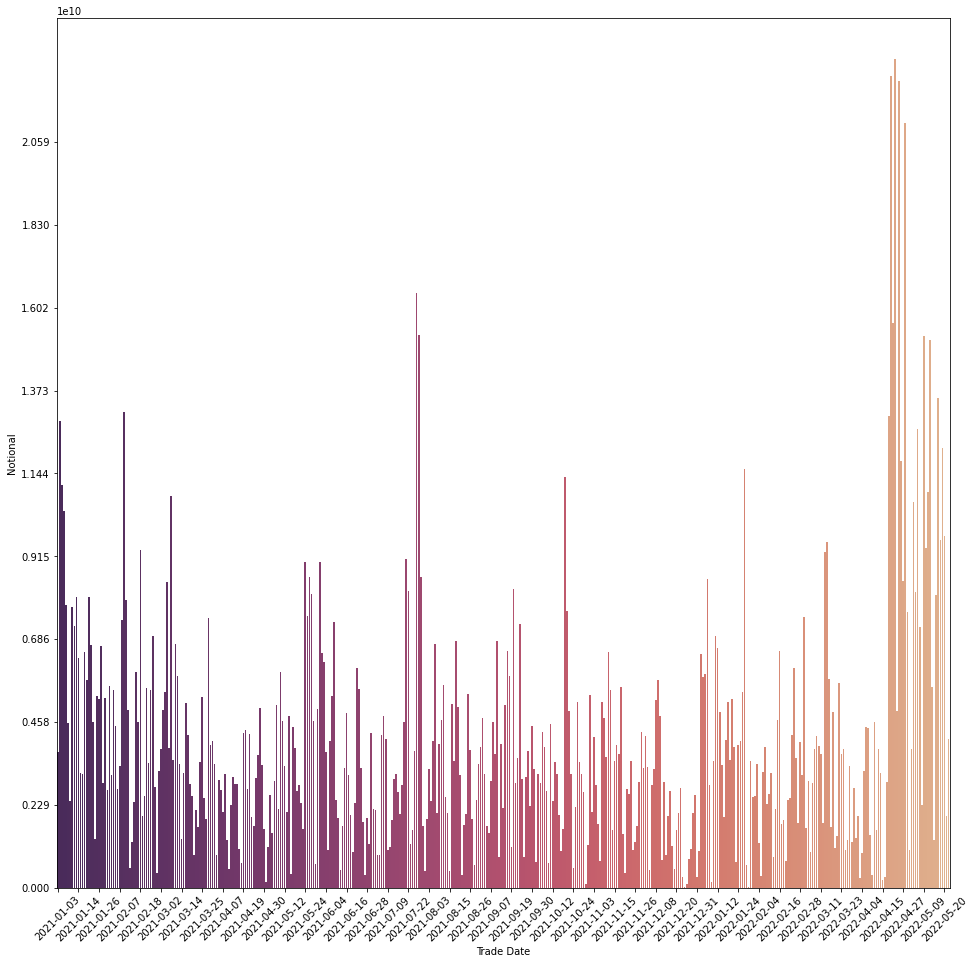

In [174]:
plt.figure(figsize=(16,16))
plt.xticks(rotation=45)

plot = sns.barplot(x="Trade Date", y = "Notional", data = by_date, palette = "flare_r")
maximumnotional = by_date.max()
maximum=maximumnotional[0]
y_range = np.arange(0, maximum, maximum/10)
plt.xticks(np.arange(0, len(by_date)+1,10))
plt.yticks(y_range)
plt.show()

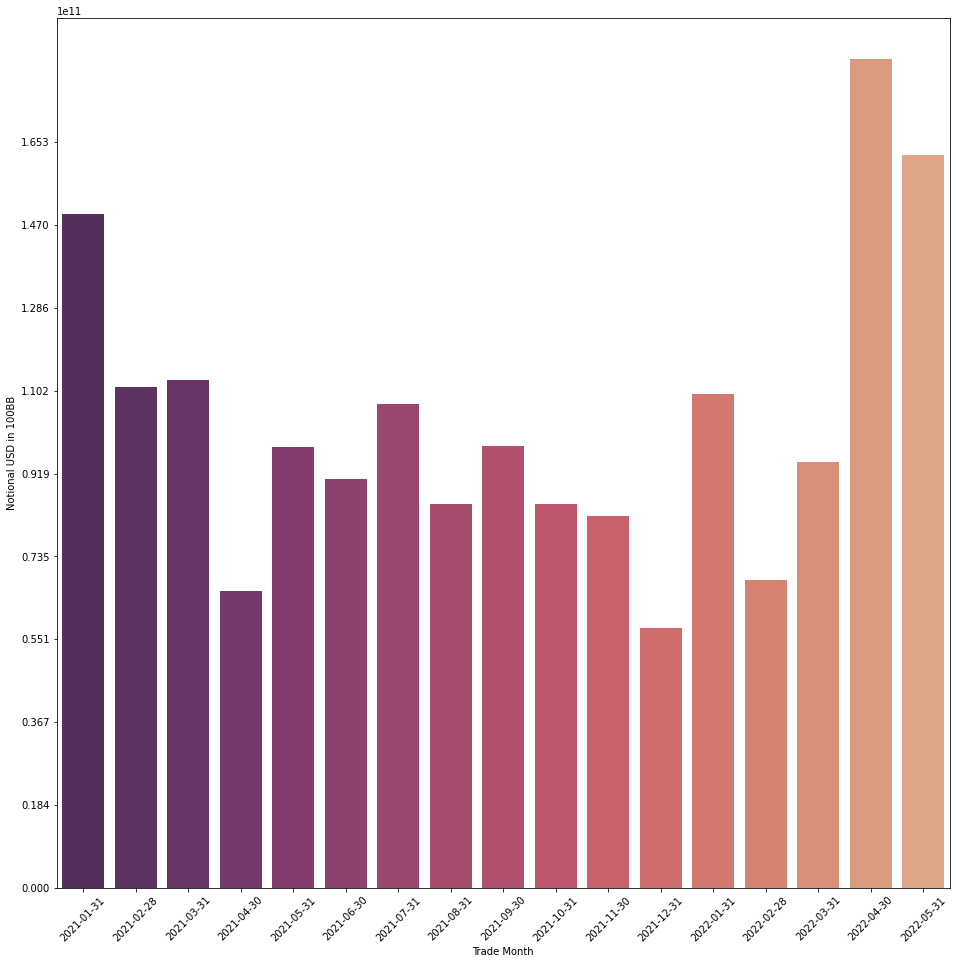

In [179]:
plt.figure(figsize=(16,16))
plt.xticks(rotation=45)

plot = sns.barplot(x = "Trade Month", y = "Notional", data = by_month, palette = "flare_r")
maximumnotional = by_month.max()
maximum=maximumnotional[0]
y_range = np.arange(0, maximum, maximum/10)
plt.ylabel("Notional USD in 100BB")
plt.yticks(y_range)
plt.show()